Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 1, w: -0.8304343223571777, b: 9.69536304473877
Epoch: 2, w: 0.3455865979194641, b: 10.460428237915039
Epoch: 3, w: 1.1509236097335815, b: 10.309170722961426
Epoch: 4, w: 1.5873286724090576, b: 10.162175178527832
Epoch: 5, w: 1.812728762626648, b: 10.07833194732666
Epoch: 6, w: 1.9277957677841187, b: 10.03451919555664
Epoch: 7, w: 1.9863651990890503, b: 10.012089729309082
Epoch: 8, w: 2.01615571975708, b: 10.000663757324219
Epoch: 9, w: 2.0313055515289307, b: 9.994850158691406
Epoch: 10, w: 2.039008378982544, b: 9.991893768310547


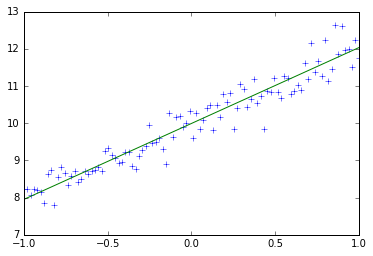

In [8]:
# TensorFlow学习笔记（十三）TensorFLow 常用Optimizer 总结
# http://blog.csdn.net/qq_36330643/article/details/76711581

# 百度搜索https://www.baidu.com/s?wd=%20Tensorflow%2013%20%E4%BC%98%E5%8C%96%E5%99%A8%20optimizer&rsv_spt=1&rsv_iqid=0xc3d4c60c0000dd0a&issp=1&f=8&rsv_bp=1&rsv_idx=2&ie=utf-8&rqlang=cn&tn=baiduhome_pg&rsv_enter=1&oq=tensorflow%25E7%25BB%2593%25E6%259E%259C%25E5%258F%25AF%25E8%25A7%2586%25E5%258C%2596add_layer&rsv_t=5a707jC2O04GdKVc%2BMfSK5go5iV0meSjp0RLoCbTwsTPsZSc2WDRnknizJ8sLPnJ2FG4&rsv_pq=c2b5298500010885&inputT=1189&rsv_sug3=40&rsv_sug1=26&rsv_sug7=000&rsv_n=2&rsv_sug2=0&rsv_sug4=1741&rsv_sug=1


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Prepare train data
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.33 + 10

# Define the model
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
loss = tf.square(Y - X*w - b)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Create session to run
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    epoch = 1
    for i in range(10):
        for (x, y) in zip(train_X, train_Y):
            _, w_value, b_value = sess.run([train_op, w, b],feed_dict={X: x,Y: y})
        print("Epoch: {}, w: {}, b: {}".format(epoch, w_value, b_value))
        epoch += 1


#draw
plt.plot(train_X,train_Y,"+")
plt.plot(train_X,train_X.dot(w_value)+b_value)
plt.show()